# 1. Загрузка данных

In [1394]:
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import scipy.stats as stats
import statsmodels.api as sm

from pandas.plotting import autocorrelation_plot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tools.tools import add_constant

In [1287]:
# Настройка отображения графиков
%matplotlib inline

data_path = Path("data/cian_rentals_clean.csv")

df = pd.read_csv(data_path)

print(f"Загружено записей: {len(df)}")

Загружено записей: 1349


In [1288]:
df

,price_per_month,metro_nearest_time,total_area,floor,has_bath_flg,has_shower_flg,has_internet_flg,has_ac_flg,has_room_furniture_flg,has_kitchen_furniture_flg,has_dishwasher_flg,has_washer_flg,has_tv_flg,has_fridge_flg,utility_fixed_bill,utility_usage_bill_flg,utility_counters_extra_flg,deposit,comission,prepayment_months_cnt,rent_term_months_cnt,combined_bathrooms_cnt,separate_bathrooms_cnt,repair_cat,freight_elevators_cnt,passenger_elevators_cnt,parking_cat,heating_cat,balcony_cnt,loggia_cnt,has_garbage_chute_flg,has_concierge_flg,entrances_cnt,individual_project_flg,era_cat,house_type_monolithic_flg,house_type_monolithic_brick_flg,house_type_panel_flg,district_krasnogvardeysky_flg,district_krasnoselsky_flg,district_moskovsky_flg,district_nevsky_flg,district_other_flg,district_primorsky_flg,district_vyborgsky_flg
0,55000,1,35.0,0.52,0,1,1,0,1,1,1,1,1,1,10000,0,0,27500,0.5,1,12,1,0,2,1,2,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,200000,19,200.0,0.80,0,0,0,0,0,0,0,0,0,0,0,0,1,200000,0.5,0,12,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,20500,4,15.0,0.25,0,1,1,0,1,1,0,1,1,1,5500,0,1,20500,1.0,1,12,1,0,1,0,0,0,1,0,0,0,0,3,1,1,0,0,0,0,0,0,0,1,0,0
3,33990,11,22.0,0.73,1,1,1,0,1,1,1,1,1,1,3500,0,1,34000,0.0,1,3,1,0,2,2,2,2,0,0,1,0,0,0,0,4,1,0,0,0,0,0,0,0,0,1
4,44000,3,24.0,0.56,1,0,1,1,1,1,1,1,1,1,0,1,1,44000,0.0,0,3,0,0,0,1,1,1,0,0,1,0,0,0,0,4,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,35000,16,40.0,0.77,0,1,1,0,1,1,0,1,1,1,0,1,1,35000,1.0,1,12,1,0,3,2,2,1,0,0,1,0,0,0,0,4,1,0,0,0,0,1,0,0,0,0
1345,30000,5,32.0,0.50,1,0,1,0,1,1,0,1,0,1,5500,0,1,30000,0.7,1,12,0,1,1,0,1,1,1,0,1,0,0,4,0,2,0,0,1,0,0,0,0,1,0,0
1346,32000,15,36.0,0.60,1,0,0,0,1,1,0,1,0,1,4000,0,1,32000,0.7,1,12,1,0,2,1,0,1,1,0,1,0,0,15,1,4,1,0,0,0,0,1,0,0,0,0
1347,33000,11,25.0,0.50,0,1,1,0,1,1,1,1,1,1,3000,0,1,30000,0.0,1,3,1,0,2,1,1,1,0,0,1,0,0,0,1,4,0,1,0,0,0,0,0,0,1,0


In [1289]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price_per_month                  1349 non-null   int64  
 1   metro_nearest_time               1349 non-null   int64  
 2   total_area                       1349 non-null   float64
 3   floor                            1349 non-null   float64
 4   has_bath_flg                     1349 non-null   int64  
 5   has_shower_flg                   1349 non-null   int64  
 6   has_internet_flg                 1349 non-null   int64  
 7   has_ac_flg                       1349 non-null   int64  
 8   has_room_furniture_flg           1349 non-null   int64  
 9   has_kitchen_furniture_flg        1349 non-null   int64  
 10  has_dishwasher_flg               1349 non-null   int64  
 11  has_washer_flg                   1349 non-null   int64  
 12  has_tv_flg                     

### **💰 Финансовые показатели**

* `price_per_month`: Стоимость аренды в месяц.
* `deposit`: Сумма залога (депозита).
* `comission`: Комиссия агенту (в долях: например, 0.5 — это 50%).
* `prepayment_months_cnt`: Количество месяцев предоплаты при заезде.
* `utility_fixed_bill`: Фиксированная стоимость коммунальных платежей (если указана).
* `utility_usage_bill_flg`: Флаг, указывающий, что арендатор оплачивает эксплуатационные расходы (ЖКХ) отдельно.
* `utility_counters_extra_flg`: Флаг, указывающий, что счетчики (вода, свет) оплачиваются сверх аренды.

---

### **🏢 Характеристики квартиры и дома**

* `total_area`: Общая площадь квартиры (кв. м).
* `floor`: Этаж (в данном датасете представлен как **нормализованное значение**: отношение текущего этажа к общему числу этажей в доме).
* `rent_term_months_cnt`: Минимальный срок аренды в месяцах.
* `repair_cat`: Категория ремонта (уровень качества отделки).
* `era_cat`: Категория эпохи постройки (от дореволюционных до современных ЖК).
* `heating_cat`: Категория типа отопления.
* `individual_project_flg`: Флаг, указывающий на индивидуальный проект здания.
* `entrances_cnt`: Количество подъездов в доме.
* `house_type_..._flg`: Тип конструкции здания (бинарные флаги):
* `house_type_monolithic_flg`: Монолитный.
* `house_type_monolithic_brick_flg`: Кирпично-монолитный.
* `house_type_panel_flg`: Панельный.

---

### **📍 Расположение и Районы**

* `metro_nearest_time`: Время в пути до ближайшего метро (в минутах).
* `district_..._flg`: Принадлежность к административному району (One-Hot Encoding):
* `krasnogvardeysky`: Красногвардейский.
* `krasnoselsky`: Красносельский.
* `moskovsky`: Московский.
* `nevsky`: Невский.
* `primorsky`: Приморский.
* `vyborgsky`: Выборгский.
* `other`: Прочие районы.

---

### **🛁 Удобства и Санузлы**

* `combined_bathrooms_cnt`: Количество совмещенных санузлов.
* `separate_bathrooms_cnt`: Количество раздельных санузлов.
* `has_bath_flg`: Наличие ванны.
* `has_shower_flg`: Наличие душевой кабины.
* `balcony_cnt`: Количество балконов.
* `loggia_cnt`: Количество лоджий.

---

### **🛠 Инфраструктура и Оснащение**

* `passenger_elevators_cnt`: Количество пассажирских лифтов.
* `freight_elevators_cnt`: Количество грузовых лифтов.
* `parking_cat`: Категория доступности парковки.
* `has_garbage_chute_flg`: Наличие мусоропровода.
* `has_concierge_flg`: Наличие консьержа.

---

### **📺 Мебель и бытовая техника**

* `has_internet_flg`: Наличие интернета.
* `has_ac_flg`: Наличие кондиционера.
* `has_room_furniture_flg`: Наличие мебели в жилых комнатах.
* `has_kitchen_furniture_flg`: Наличие кухонного гарнитура.
* `has_dishwasher_flg`: Наличие посудомоечной машины.
* `has_washer_flg`: Наличие стиральной машины.
* `has_tv_flg`: Наличие телевизора.
* `has_fridge_flg`: Наличие холодильника.

# 2. Предварительный анализ данных
## 2.1. Цена аренды

In [1290]:
def draw_hists(df, col, title=""):
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f"Распределение '{title}'")

    plt.subplot(1, 2, 2)
    sns.histplot(np.log1p(df[col]), kde=True, bins=50, color="green")
    plt.title(f"Log-распределение '{title}'")
    plt.show()

    print("Топ 10:")
    display(df.sort_values(col, ascending=False).head(10)[[col]])


def draw_boxplot(df, col, title=""):
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot '{title}'")
    plt.show()

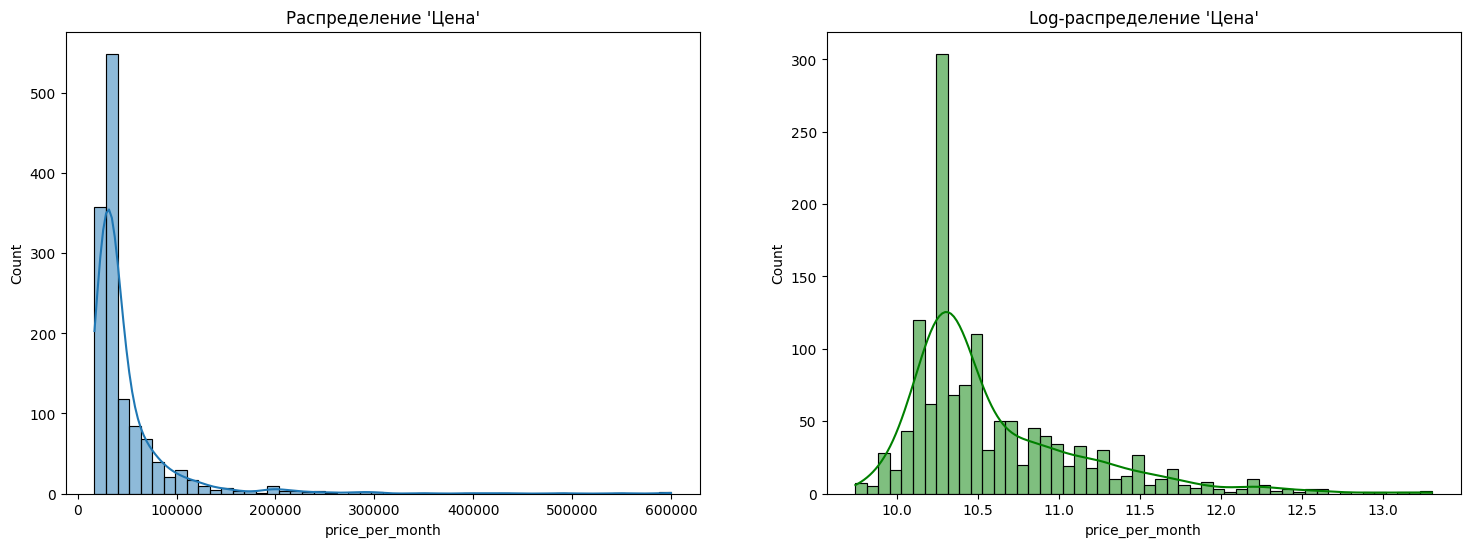

Топ 10:


,price_per_month
1128,600000
1139,600000
155,550000
173,490000
121,430000
361,400000
1159,350000
1118,300000
237,300000
1082,295000


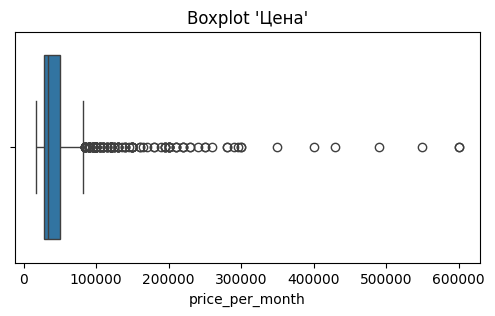

In [1291]:
draw_hists(df, "price_per_month", "Цена")
draw_boxplot(df, "price_per_month", "Цена")

In [1292]:
def clip_by_percentile(df, col, a=0.99, b=None):
    # Если b не передан, значит a - это верхний порог
    if b is None:
        lower_p = 0.0
        upper_p = a
    else:
        lower_p = a
        upper_p = b

    lower = df[col].quantile(lower_p)
    upper = df[col].quantile(upper_p)

    return df[(df[col] >= lower) & (df[col] <= upper)].copy()

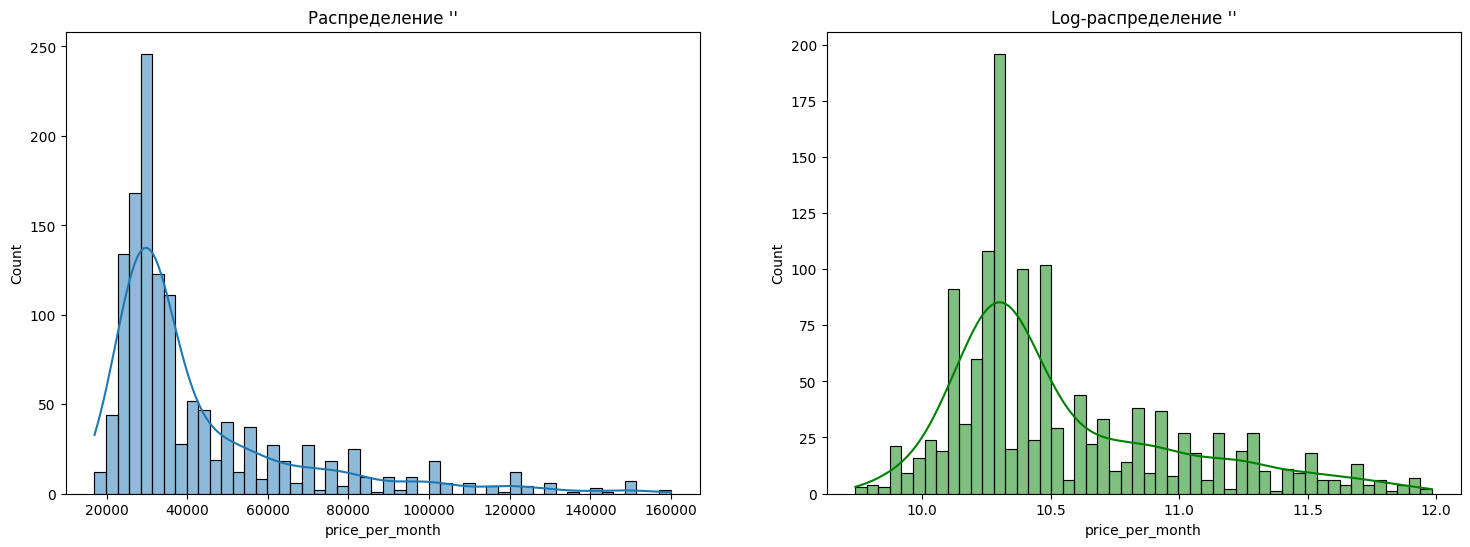

Топ 10:


,price_per_month
22,160000
502,160000
587,150000
584,150000
1213,150000
1222,150000
359,150000
499,150000
52,149900
1058,145000


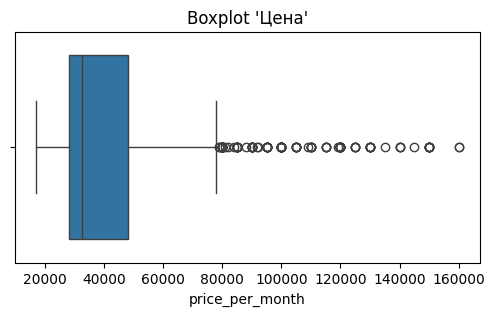

1349 1309


In [1293]:
df_clean = clip_by_percentile(df, "price_per_month", 0.97)

draw_hists(df_clean, "price_per_month")
draw_boxplot(df_clean, "price_per_month", "Цена")
print(len(df), len(df_clean))

In [1294]:
df = df_clean.copy()

## 2.2. Площадь жилья

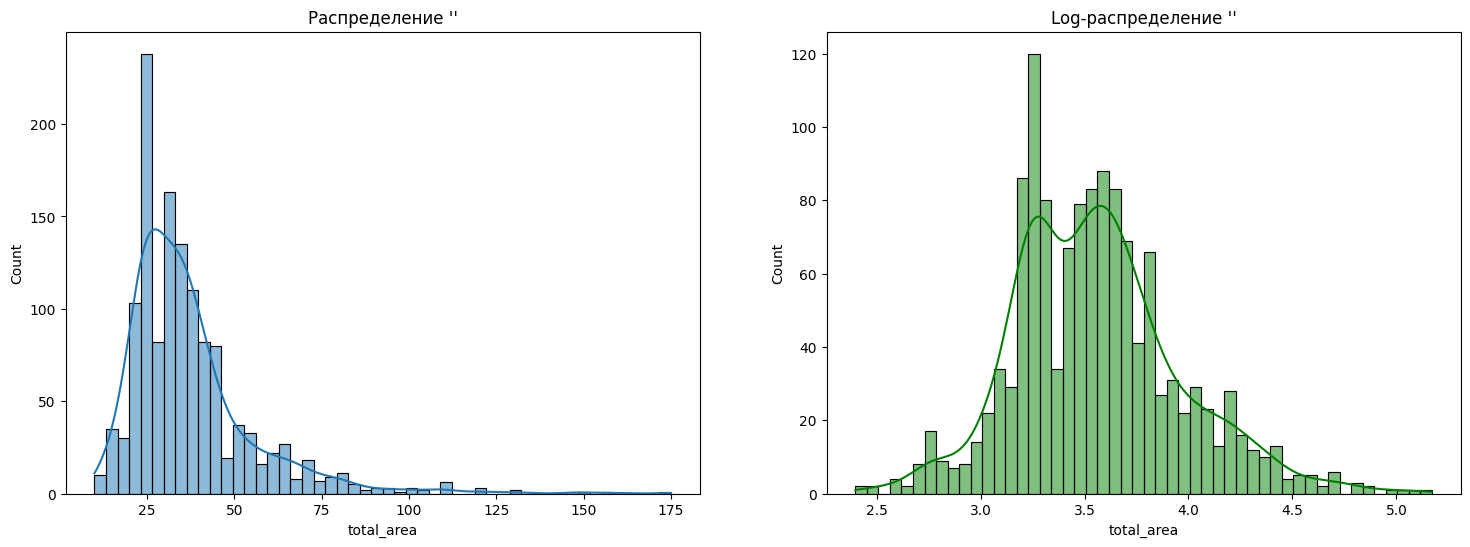

Топ 10:


,total_area
352,175.0
1218,158.0
585,150.0
500,147.0
1124,130.0
309,130.0
1058,121.6
1196,120.0
1207,120.0
584,111.0


In [1295]:
draw_hists(df, "total_area")

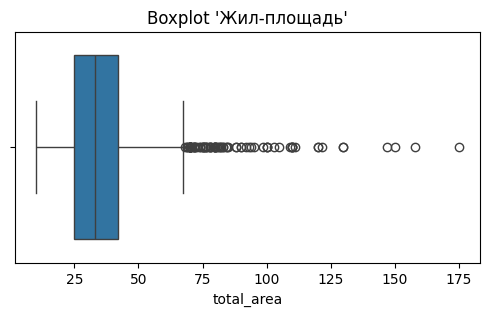

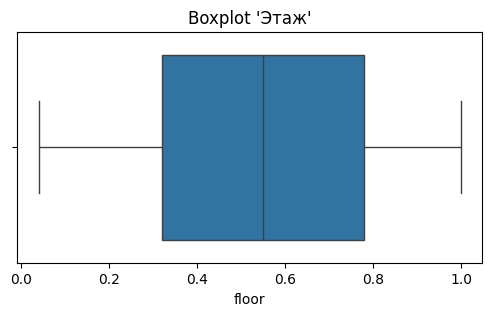

In [1296]:
draw_boxplot(df, "total_area", "Жил-площадь")
draw_boxplot(df, "floor", "Этаж")

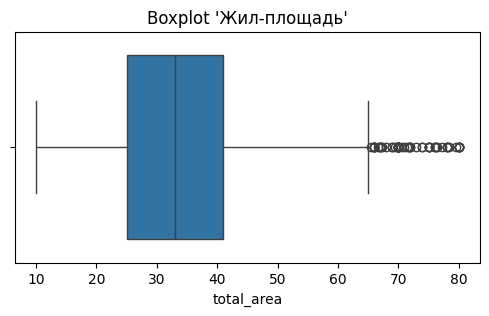

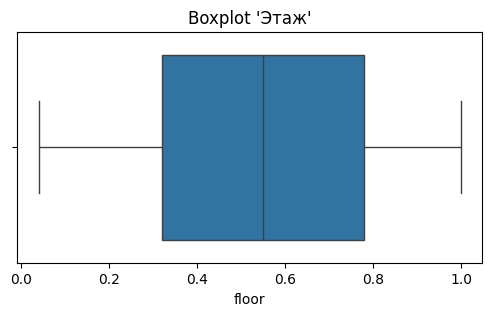

Отсечено строк: 39


In [1297]:
df_clean = clip_by_percentile(df, "total_area", 0.97)

draw_boxplot(df_clean, "total_area", "Жил-площадь")
draw_boxplot(df_clean, "floor", "Этаж")

print("Отсечено строк:", len(df) - len(df_clean))

In [1298]:
df = df_clean.copy()

## 2.3. Корреляция

In [1299]:
REDFLAG_NAMES = ["flg", "cat", "cnt"]

number_cols = list(
    filter(lambda x: all([i not in x for i in REDFLAG_NAMES]), df.select_dtypes(include=np.number).columns)
)
number_cols

['price_per_month',
 'metro_nearest_time',
 'total_area',
 'floor',
 'utility_fixed_bill',
 'deposit',
 'comission']

In [1300]:
def draw_corr_heatmap(df, cols):
    plt.figure(figsize=(10, 8))
    corr_matrix = df[cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Корреляция")
    plt.show()
    return corr_matrix

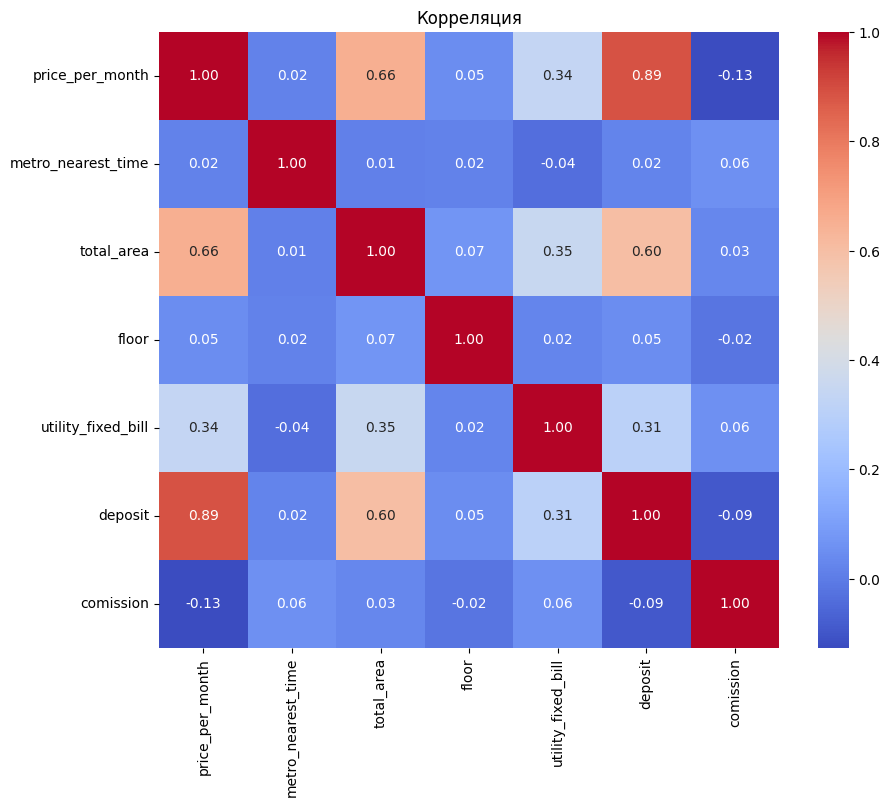

In [1301]:
corr_matrix = draw_corr_heatmap(df, number_cols)

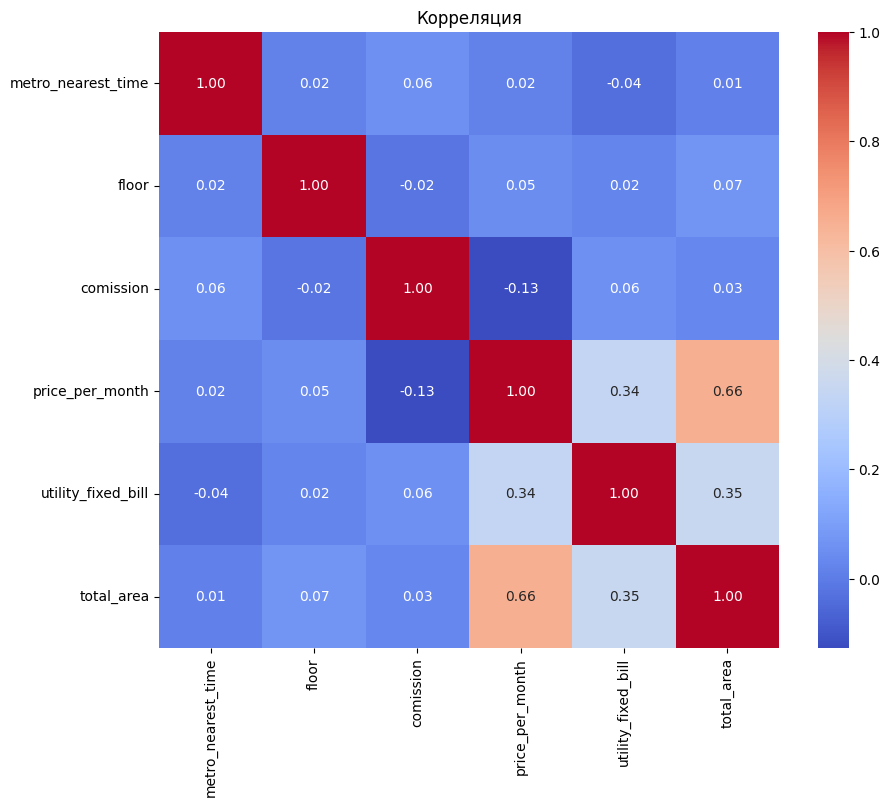

,metro_nearest_time,floor,comission,price_per_month,utility_fixed_bill,total_area
metro_nearest_time,1.000000,0.018887,0.056097,0.016112,-0.036956,0.014115
floor,0.018887,1.000000,-0.020625,0.046369,0.024284,0.069981
comission,0.056097,-0.020625,1.000000,-0.126291,0.055081,0.029414
price_per_month,0.016112,0.046369,-0.126291,1.000000,0.336961,0.656104
utility_fixed_bill,-0.036956,0.024284,0.055081,0.336961,1.000000,0.349723
total_area,0.014115,0.069981,0.029414,0.656104,0.349723,1.000000


In [1302]:
CORR_THRESHOLD = 0.7
TARGET = "price_per_month"

big_correlation_columns = []
for col in corr_matrix.columns:
    if col != TARGET and abs(corr_matrix.loc[col, TARGET]) > CORR_THRESHOLD:
        if col in number_cols:
            big_correlation_columns.append(col)

draw_corr_heatmap(df, list(set(number_cols).difference(big_correlation_columns)))

In [1303]:
big_correlation_columns

['deposit']

In [1304]:
df.drop(columns=big_correlation_columns, inplace=True)

In [1305]:
df_clean = df.copy()

## 2.4. Мультиколлинеарность (предпосылка ТГМ)

In [1306]:
def VIF(df):
    cols_names = df.select_dtypes(include=[np.number]).columns.tolist()
    cols_names_without_target = [c for c in cols_names if c not in TARGET]
    X = df[cols_names_without_target]
    X_with_const = add_constant(X)

    vif_data = pd.DataFrame()
    vif_data["feature"] = X_with_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

    return vif_data.sort_values(by="VIF", ascending=False)

In [1307]:
VIF(df_clean)

,feature,VIF
0,const,101.515724
41,district_other_flg,5.453486
42,district_primorsky_flg,4.137610
35,house_type_monolithic_brick_flg,3.357956
37,district_krasnogvardeysky_flg,3.266516
20,combined_bathrooms_cnt,3.192880
43,district_vyborgsky_flg,3.128967
21,separate_bathrooms_cnt,3.071313
40,district_nevsky_flg,3.015287
38,district_krasnoselsky_flg,2.907601


<span style="background-color: #177a17; color: #d6d6d6ff; padding: 8px; border-radius: 4px">
    <b>Вывод</b>: у признаков отсутствует мультиколлинеарность!
</span>

## 2.5. Удаление дубликатов

In [1311]:
duplicates = df[df.duplicated(keep="first")]
print(f"Количество полных дубликатов: {len(duplicates)}")
print(f"Всего данных: {len(df)}")

Количество полных дубликатов: 3
Всего данных: 1270


In [1312]:
df = df.drop_duplicates(keep="first")

# 3. Линрег
## 3.1. Обучение

In [1328]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["price_per_month"])
y = df["price_per_month"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

Обучающая выборка: (1013, 43)
Тестовая выборка: (254, 43)


In [1329]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
)


def adj_r2_score(y_true, y_pred, n_samples, n_features):
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * ((n_samples - 1) / (n_samples - n_features - 1))


ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)


def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    adj_r2 = adj_r2_score(y_true, y_pred, X_test.shape[0], X_test.shape[1])

    print(f"--- {model_name} Performance ---")
    print(f"MAE:    {mae:,.0f}")
    print(f"MAPE:   {mape:.2%}")
    print(f"MSE:    {mse:,.2f}")
    print(f"RMSE:   {rmse:,.2f}")
    print(f"R2:     {r2:.4f}")
    print(f"adj R2: {adj_r2:.4f}")


evaluate_model(y_test, y_pred_ridge, "Ridge")

--- Ridge Performance ---
MAE:    9,305
MAPE:   23.82%
MSE:    156,623,468.08
RMSE:   12,514.93
R2:     0.6157
adj R2: 0.5370


## 3.2. Анализ
### 3.2.1. Остатки

In [ ]:
errors = pd.DataFrame({"actual": y_test, "predicted": y_pred_ridge}).round(2)
errors["abs_diff"] = (errors["actual"] - errors["predicted"]).abs()
errors["diff"] = errors["predicted"] - errors["actual"]
errors.sort_values(by="abs_diff", ascending=False).head(60)

,actual,predicted,abs_diff,diff
359,150000,89849.87,60150.13,-60150.13
928,35000,79154.75,44154.75,44154.75
1212,135000,100024.28,34975.72,-34975.72
1185,46000,80133.59,34133.59,34133.59
1131,38000,71132.13,33132.13,33132.13
61,100000,67494.36,32505.64,-32505.64
1210,120000,87924.34,32075.66,-32075.66
1208,125000,93951.03,31048.97,-31048.97
274,105000,74831.26,30168.74,-30168.74
1094,105000,75771.88,29228.12,-29228.12


### 3.2.2. Диаграмма рассеяния y_pred от y_test

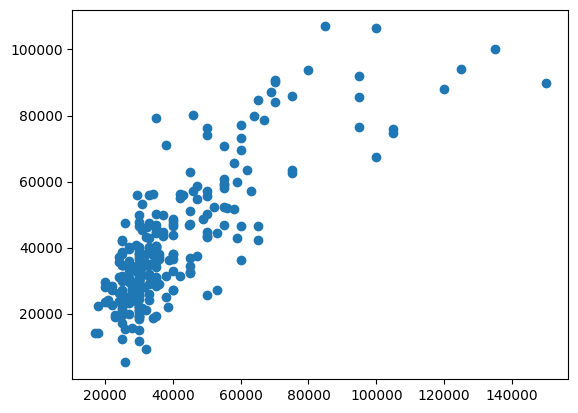

In [1331]:
plt.scatter(y_test, y_pred_ridge)
plt.show()

### 3.2.3. Подобранные моделью коэффициенты

In [1333]:
pd.DataFrame({"feature": X.columns, "coef": ridge_model.named_steps["ridge"].coef_}).sort_values(
    by="coef", ascending=False
)

,feature,coef
1,total_area,12674.373937
21,repair_cat,4622.292156
9,has_dishwasher_flg,4241.256809
6,has_ac_flg,2952.382266
24,parking_cat,2446.559641
34,house_type_monolithic_brick_flg,1785.579913
14,utility_usage_bill_flg,1564.878386
13,utility_fixed_bill,1484.508780
7,has_room_furniture_flg,1037.884007
12,has_fridge_flg,736.088123


### 3.2.4. Распределение остатков и их постоянство (предпосылка ТГМ)

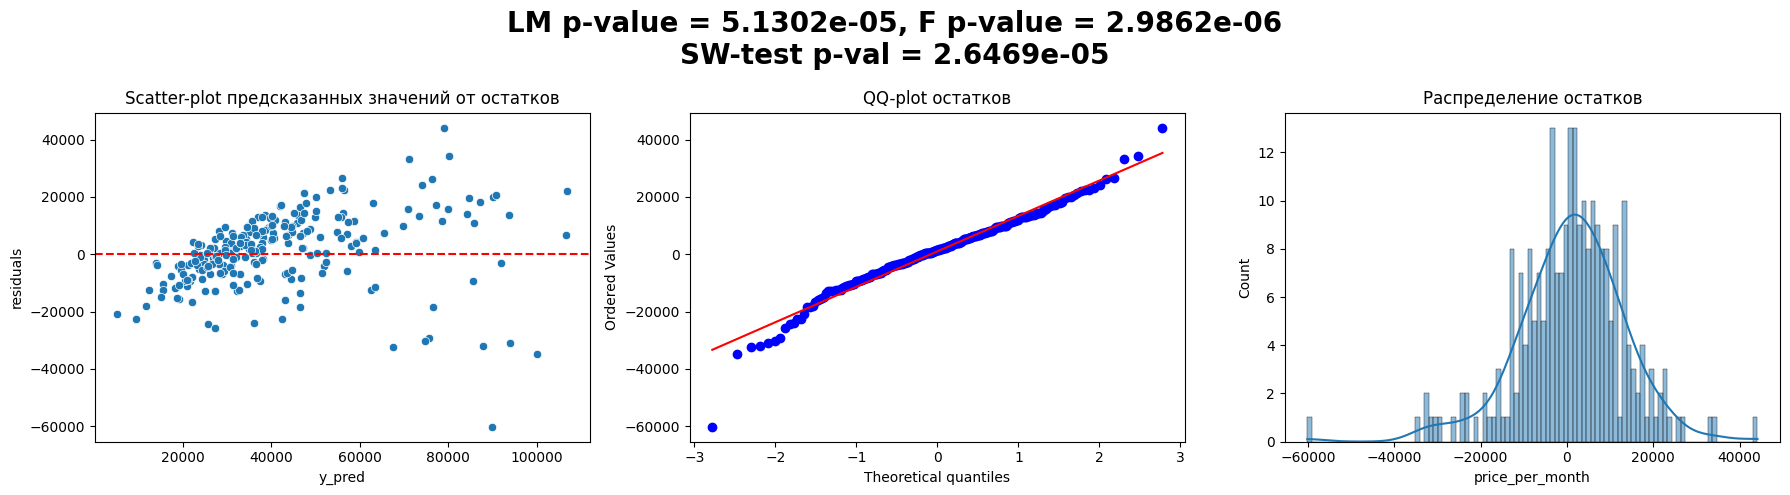

In [1415]:
residuals = y_pred_ridge - y_test

X_test_const = sm.add_constant(X_test)

_, lm_pval, _, f_pval = het_breuschpagan(residuals, X_test_const)

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=y_pred_ridge, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("y_pred")
plt.ylabel("residuals")
plt.title("Scatter-plot предсказанных значений от остатков")

plt.subplot(1, 3, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ-plot остатков")

plt.subplot(1, 3, 3)
sns.histplot(residuals, kde=True, bins=100)
plt.title("Распределение остатков")

stat, p_val = stats.shapiro(residuals)
plt.suptitle(
    f"LM p-value = {lm_pval:.4e}, F p-value = {f_pval:.4e}\nSW-test p-val = {p_val:.4e}", fontsize=20, fontweight="bold"
)

plt.tight_layout()
plt.show()

**Выводы:**
<ul>
    <li>
        <span style="background-color: #7a1717ff; color: #d6d6d6ff; padding: 8px; margin: 2px 0; border-radius: 4px; display: inline-block">
            согласно тесту Бройша-Пагана остатки статзначимо НЕ имеют свойство гомоскедастичности...
        </span>
    </li>
    <li>
        <span style="background-color: #7a1717ff; color: #d6d6d6ff; padding: 8px; margin: 2px 0; border-radius: 4px; display: inline-block">
            согласно тесту Шапиро-Уилка остатки статзначимо распределены НЕ нормально...
        </span>
    </li>
</ul>

### 3.2.6. Автокорреляция остатков (предпосылка ТГМ)

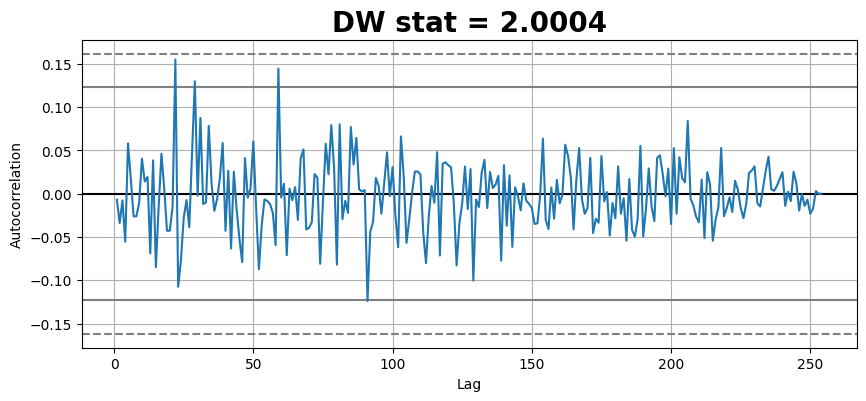

In [1404]:
plt.figure(figsize=(10, 4))

dw_stat = durbin_watson(residuals)

autocorrelation_plot(residuals, ax=plt.gca())

plt.title(f"DW stat = {dw_stat:.4f}", fontsize=20, fontweight="bold")
plt.show()

<span style="background-color: #177a17; color: #d6d6d6ff; padding: 8px; border-radius: 4px">
    <b>Вывод</b>: статзначимой автокорреляции остатков не обнаружено!
</span>

## 3.3. Вывод по линейной регрессии

После предварительного анализа данных и пробного запуска модели линейной регрессии с Ridge регуляризацией было выявлено, что модель очень часто ошибается, сильно завышая реальные цены.

Были выполнены проверки предпосылок теоремы Гаусса-Маркова:
- Тест Дарбина-Уотсона показал отсутствие автокорреляции
- VIF показал отсутствие критической мультиколлинеарности
- Анализ остатков выявил ненормальность распределения (SW p-value<0.05) и смещение среднего на тесте (F p-value < 0.05)
 
Это, в сочетании с нелинейностью данных, подтверждает, что простая линейная регрессия здесь недостаточна

# 4. Градиентный бустинг
## 4.1. Обучение

In [ ]:
from catboost import CatBoostRegressor, Pool

cat_features = []

In [ ]:
cb_model = CatBoostRegressor(
    iterations=2000,
    learning_rate=0.03,
    depth=8,
    loss_function="RMSE",
    verbose=500,
    random_seed=42,
    early_stopping_rounds=200,
)

cb_model.fit(X_train, y_train, eval_set=(X_test, y_test), cat_features=cat_features, use_best_model=True)

y_pred_cb = cb_model.predict(X_test)

evaluate_model(y_test, y_pred_cb, "CatBoost (Raw Target)")

0:	learn: 21585.8492964	test: 19806.2235446	best: 19806.2235446 (0)	total: 2.54ms	remaining: 5.07s
500:	learn: 3065.6533200	test: 9944.0075347	best: 9942.3525097 (495)	total: 1.11s	remaining: 3.34s
1000:	learn: 1464.9275106	test: 9864.3517949	best: 9862.1137389 (914)	total: 2.17s	remaining: 2.16s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 9858.922978
bestIteration = 1080

Shrink model to first 1081 iterations.
--- CatBoost (Raw Target) Performance ---
MAE:    6,630
MAPE:   16.36%
MSE:    97,198,362.29
RMSE:   9,858.92
R2:     0.7615
adj R2: 0.7126


In [1450]:
cb_log_model = CatBoostRegressor(
    iterations=2000,
    learning_rate=0.03,
    depth=6,
    loss_function="RMSE",
    verbose=500,
    random_seed=42,
    early_stopping_rounds=200,
)

y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

cb_log_model.fit(
    X_train,
    y_train_log,
    eval_set=(X_test, y_test_log),
    cat_features=cat_features,
    use_best_model=True,
)

y_pred_cb_log_raw = cb_log_model.predict(X_test)
y_pred_cb_final = np.expm1(y_pred_cb_log_raw)

evaluate_model(y_test, y_pred_cb_final, "CatBoost (Log Target)")

0:	learn: 0.4117962	test: 0.3843803	best: 0.3843803 (0)	total: 941us	remaining: 1.88s
500:	learn: 0.1051586	test: 0.1957381	best: 0.1954173 (451)	total: 340ms	remaining: 1.02s
1000:	learn: 0.0664037	test: 0.1934872	best: 0.1933896 (873)	total: 721ms	remaining: 720ms
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.1933896117
bestIteration = 873

Shrink model to first 874 iterations.
--- CatBoost (Log Target) Performance ---
MAE:    6,624
MAPE:   15.76%
MSE:    98,372,259.29
RMSE:   9,918.28
R2:     0.7586
adj R2: 0.7092


In [1451]:
import optuna

train_pool = Pool(X_train, y_train_log, cat_features=cat_features)
test_pool = Pool(X_test, y_test_log, cat_features=cat_features)


def objective(trial):
    params = {
        "iterations": 2000,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
        "random_strength": trial.suggest_float("random_strength", 0, 1),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0, 1),
        "loss_function": "RMSE",
        "random_seed": 42,
        "verbose": False,
        "early_stopping_rounds": 200,
    }

    model = CatBoostRegressor(**params)
    model.fit(train_pool, eval_set=test_pool)

    return model.get_best_score()["validation"]["RMSE"]


study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100, timeout=3600)

print("Best params:", study.best_params)
print("Best Log-RMSE:", study.best_value)

[I 2026-01-30 17:56:01,819] A new study created in memory with name: no-name-661fa503-8582-420b-a006-92272f01163b
[I 2026-01-30 17:56:02,282] Trial 0 finished with value: 0.19797009547871738 and parameters: {'learning_rate': 0.04952219824733617, 'depth': 5, 'l2_leaf_reg': 4.648052034697867, 'random_strength': 0.5696275165787912, 'bagging_temperature': 0.4918553339168429}. Best is trial 0 with value: 0.19797009547871738.
[I 2026-01-30 17:56:02,701] Trial 1 finished with value: 0.1961504398425312 and parameters: {'learning_rate': 0.07087610703444379, 'depth': 5, 'l2_leaf_reg': 6.304998275583314, 'random_strength': 0.9993708486531971, 'bagging_temperature': 0.8207937221887336}. Best is trial 1 with value: 0.1961504398425312.
[I 2026-01-30 17:56:03,611] Trial 2 finished with value: 0.19780360519225915 and parameters: {'learning_rate': 0.013031687171529792, 'depth': 5, 'l2_leaf_reg': 7.907280702482044, 'random_strength': 0.2889311814285016, 'bagging_temperature': 0.02156954675931666}. Best 

Best params: {'learning_rate': 0.05139284395375521, 'depth': 8, 'l2_leaf_reg': 4.920491398886455, 'random_strength': 0.6953667867890165, 'bagging_temperature': 0.794867528897562}
Best Log-RMSE: 0.1913877829994505


In [1483]:
best_params = study.best_params
best_params["iterations"] = 2000
best_params["loss_function"] = "RMSE"
best_params["random_seed"] = 42
best_params["verbose"] = 500
best_params["early_stopping_rounds"] = 200

print("--- Обучение финальной CatBoost модели с лучшими параметрами (Log Target) ---")

final_cb_model = CatBoostRegressor(**best_params)

final_cb_model.fit(X_train, y_train_log, eval_set=(X_test, y_test_log), cat_features=cat_features, use_best_model=True)

# Предсказание и обратное преобразование
y_pred_cb_log_raw = final_cb_model.predict(X_test)
y_pred_cb = np.expm1(y_pred_cb_log_raw)

evaluate_model(y_test, y_pred_cb, "CatBoost (Final Optuna, Log Target)")

--- Обучение финальной CatBoost модели с лучшими параметрами (Log Target) ---
0:	learn: 0.4081327	test: 0.3809224	best: 0.3809224 (0)	total: 2.63ms	remaining: 5.25s
500:	learn: 0.0518211	test: 0.1917990	best: 0.1917907 (496)	total: 1.12s	remaining: 3.35s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.191387783
bestIteration = 531

Shrink model to first 532 iterations.
--- CatBoost (Final Optuna, Log Target) Performance ---
MAE:    6,455
MAPE:   15.30%
MSE:    96,336,909.12
RMSE:   9,815.14
R2:     0.7636
adj R2: 0.7152


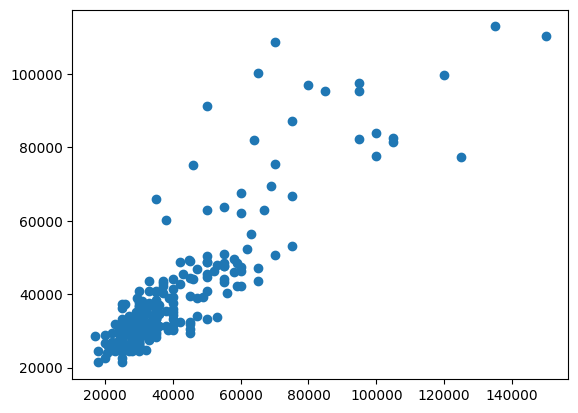

In [1484]:
plt.scatter(y_test, y_pred_cb)
plt.show()

## 4.2. Анализ влияния признаков

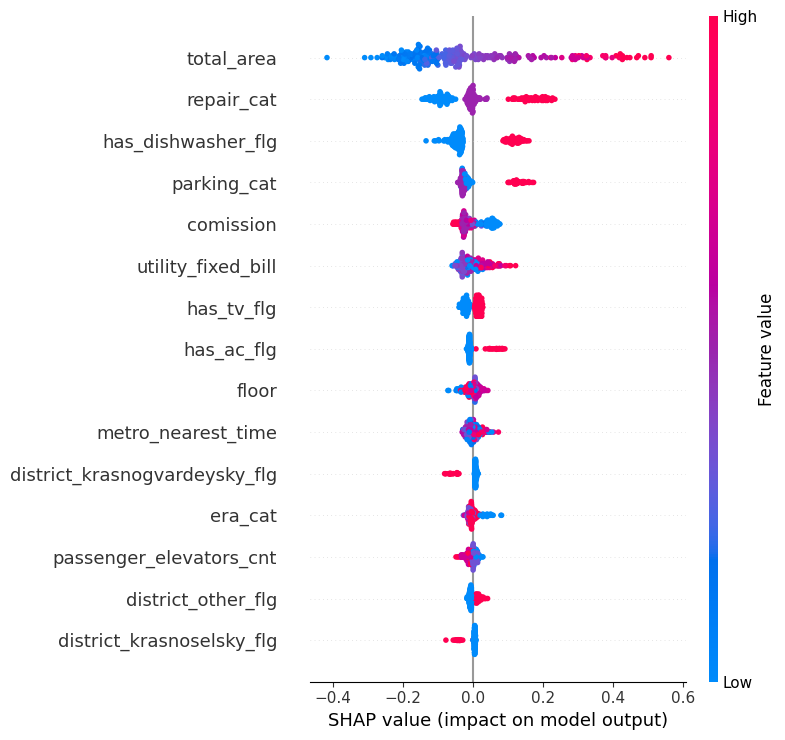

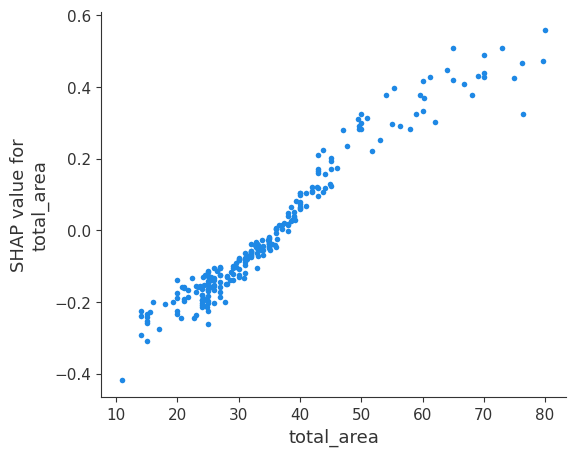

In [1494]:
import shap

explainer = shap.TreeExplainer(final_cb_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, max_display=15)
shap.dependence_plot("total_area", shap_values, X_test, interaction_index=None)

## 4.3. Бизнес кейс - определение недооцененных и переоцененных предложений

In [1490]:
results = X_test.copy()
results["actual_price"] = y_test
results["predicted_price"] = y_pred_cb
results["residual"] = results["actual_price"] - results["predicted_price"]
results["abs_residual"] = np.abs(results["residual"])
results["undervalued_diff"] = results["predicted_price"] - results["actual_price"]
results["undervalued_percent"] = (results["undervalued_diff"] / results["actual_price"]) * 100

print("ТОП-10 недооцененных предложений:")
top_deals = results.sort_values("undervalued_diff", ascending=False).head(10).round(2)

display(
    top_deals[
        [
            "actual_price",
            "predicted_price",
            "undervalued_diff",
            "undervalued_percent",
            "total_area",
            "metro_nearest_time",
        ]
    ]
)


print("ТОП-10 переоцененных предложений:")
overpriced = results.sort_values("undervalued_diff", ascending=True).head(10).round(2)

display(
    overpriced[
        [
            "actual_price",
            "predicted_price",
            "undervalued_diff",
            "undervalued_percent",
            "total_area",
            "metro_nearest_time",
        ]
    ]
)

ТОП-10 недооцененных предложений:


,actual_price,predicted_price,undervalued_diff,undervalued_percent,total_area,metro_nearest_time
239,50000,91358.91,41358.91,82.72,47.0,18
322,70000,108561.10,38561.10,55.09,70.0,16
477,65000,100193.83,35193.83,54.14,51.0,16
928,35000,65983.34,30983.34,88.52,60.3,11
1185,46000,75063.72,29063.72,63.18,65.0,15
1131,38000,60073.10,22073.10,58.09,54.0,17
456,64000,81973.96,17973.96,28.08,43.0,7
215,80000,97036.36,17036.36,21.30,64.0,4
93,50000,63037.94,13037.94,26.08,33.0,6
668,25000,37330.97,12330.97,49.32,25.0,19


ТОП-10 переоцененных предложений:


,actual_price,predicted_price,undervalued_diff,undervalued_percent,total_area,metro_nearest_time
1208,125000,77290.40,-47709.60,-38.17,75.0,18
359,150000,110347.70,-39652.30,-26.43,50.0,14
274,105000,81419.67,-23580.33,-22.46,49.7,16
1094,105000,82449.17,-22550.83,-21.48,49.7,16
61,100000,77533.28,-22466.72,-22.47,38.0,17
1212,135000,112895.21,-22104.79,-16.37,70.0,13
483,75000,53103.76,-21896.24,-29.19,35.5,5
170,65000,43521.26,-21478.74,-33.04,28.0,7
1210,120000,99600.42,-20399.58,-17.00,50.0,11
199,53100,33808.06,-19291.94,-36.33,33.0,6


## 4.4. Сохранение модели

In [1493]:
import os

model_dir = Path("models")
model_path = model_dir / "catboost_price_predictor.cbm"

os.makedirs(model_dir, exist_ok=True)

final_cb_model.save_model(model_path)

print(f"Финальная модель сохранена в: {model_path}")

Финальная модель сохранена в: models/catboost_price_predictor.cbm
